## Load the packages

In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from scipy.interpolate import interpn
import math
import warnings

%matplotlib inline

import xarray as xr
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

from matplotlib import cm


In [2]:
# for the polygon intersections
import shapely.geometry as sg
import descartes
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.path as mpath
import cartopy.feature as cfeature
#from xgcm import Grid

In [3]:
from scipy.interpolate import interpn
from shapely.ops import unary_union
from shapely import Point

In [4]:
ds = xr.open_dataset('/scratch/project_2000789/muramarg/waom_total/output_WAOM_check/ocean_flt.nc')
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/waom_total/output_WAOM_check/ocean_rst.nc')

In [5]:
dg = xr.open_dataset('/scratch/project_2000789/muramarg/copied_files/waom10extend_grd.nc')
ds.coords["lon_rho"] = dg.lon_rho
ds.coords["lat_rho"] = dg.lat_rho

In [6]:
# write these to files? does this save time
xgrid = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/text_files/xgrid_dsw.txt",sep=",")
ygrid = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/text_files/ygrid_dsw.txt",sep=",")

xgrid = xgrid.reshape((35040,-1))
ygrid = ygrid.reshape((35040,-1))

### Examples of heat and salt flux over time

In [7]:
# # This is the map projection we want to plot *onto*
# map_proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
# sh = ds.shflux.isel(ocean_time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],xi_rho=slice(450, 600),eta_rho=slice(300,450))

# p = sh.plot(transform=ccrs.PlateCarree(),  # the data's projection
#               x="lon_rho", y="lat_rho",col='ocean_time',col_wrap=4,  
#              subplot_kws={'projection': map_proj}, vmin=-150, vmax=150, cmap=cm.get_cmap('coolwarm'))  # the plot's projection

# plt.show()

In [8]:
# # # This is the map projection we want to plot *onto*
# map_proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
# ss = ds.ssflux.isel(ocean_time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],xi_rho=slice(450, 600),eta_rho=slice(300,450))

# p = ss.plot(transform=ccrs.PlateCarree(),  # the data's projection
#               x="lon_rho", y="lat_rho",col='ocean_time',col_wrap=4,  
#              subplot_kws={'projection': map_proj}, vmin=-2e-5, vmax=2e-5, cmap=cm.get_cmap('coolwarm'))  # the plot's projection

# plt.show()

In [9]:
pollocs2 = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/text_files/pollocs_dsw.txt",sep=",",dtype=int)
pollocs2.shape

(4458,)

In [10]:
# seasonal distributions of the groups
# this says months but really it is a distribution of them by 13 4-week intervals
# find the repeating releases for each of the 105 points
month_idx = np.arange(0,52) #(13,8760)
x = 0
m = 1
for i in range(len(month_idx)):
    month_idx[i] = m
    
    x += 1
    if x == 4:
        x = 0
        m += 1
# repeat this for the 105 points
df_months_i = np.array([],dtype=int)
for i in range(391):
    df_months_i = np.append(df_months_i,month_idx)

unique, counts = np.unique(df_months_i, return_counts=True)
print(unique,counts)
df_months_i = df_months_i[pollocs2]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13] [1564 1564 1564 1564 1564 1564 1564 1564 1564 1564 1564 1564 1564]


In [11]:
# or load from the grouping of 4 files
# load with 4 groups
group1 = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/GroupFiles/group1_dsw.txt",sep=",")
group2 = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/GroupFiles/group2_dsw.txt",sep=",")
group3 = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/GroupFiles/group3_dsw.txt",sep=",")
group4 = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/GroupFiles/group4_dsw.txt",sep=",")

group1 = group1.tolist()
group1 = [int(x) for x in group1]
group2 = group2.tolist()
group2 = [int(x) for x in group2]
group3 = group3.tolist()
group3 = [int(x) for x in group3]
group4 = group4.tolist()
group4 = [int(x) for x in group4]

groups = np.array([group1,group2,group3,group4],dtype=object)

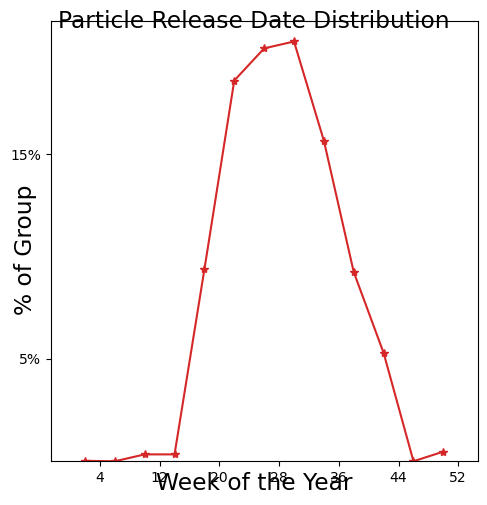

In [12]:
# # Distribution of Various Quantities
#fig = plt.figure(figsize = (16,8))

# fig, axes = plt.subplots(figsize=(16,8),nrows=3, ncols=2,sharex=True,sharey=True)

# or 4 groups
fig, axes = plt.subplots(figsize=(5,5),nrows=1, ncols=1,sharex=True,sharey=True)

plt.tight_layout()
plt.rcParams.update({'font.size': 14})
plt.suptitle("Particle Release Date Distribution")
fig.supxlabel('Week of the Year')
fig.supylabel('% of Group')
i = 1
xticks=[2,4,6,8,10,12,14]
yticks=[0.05,0.15,0.25]

y,edges,_ = plt.hist(df_months_i,alpha=0,edgecolor="blue",facecolor="gray",bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(df_months_i)) / len(df_months_i))
# mystr = "Group " + str(i) + ": " + str(len(group))
    
# plt.title(mystr)
plt.xticks(xticks,labels=[4,12,20,28,36,44,52])
plt.yticks(yticks,labels=["5%","15%","25%"])

i  += 1
    
#y,edges,_ = plt.hist(test_scores1, bins)
xcenters = (edges[:-1] + edges[1:]) / 2
#y,edges = np.histogram(df_months_i[group], bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
#centers = 0.5*(edges[1:]+ edges[:-1])
plt.plot(xcenters,y,'-*',color="tab:red")
    
#fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,wspace=0.05, hspace=0.2)

In [13]:
g1_i = df_months_i[group1]
g2_i = df_months_i[group2]
g3_i = df_months_i[group3]
g4_i = df_months_i[group4]

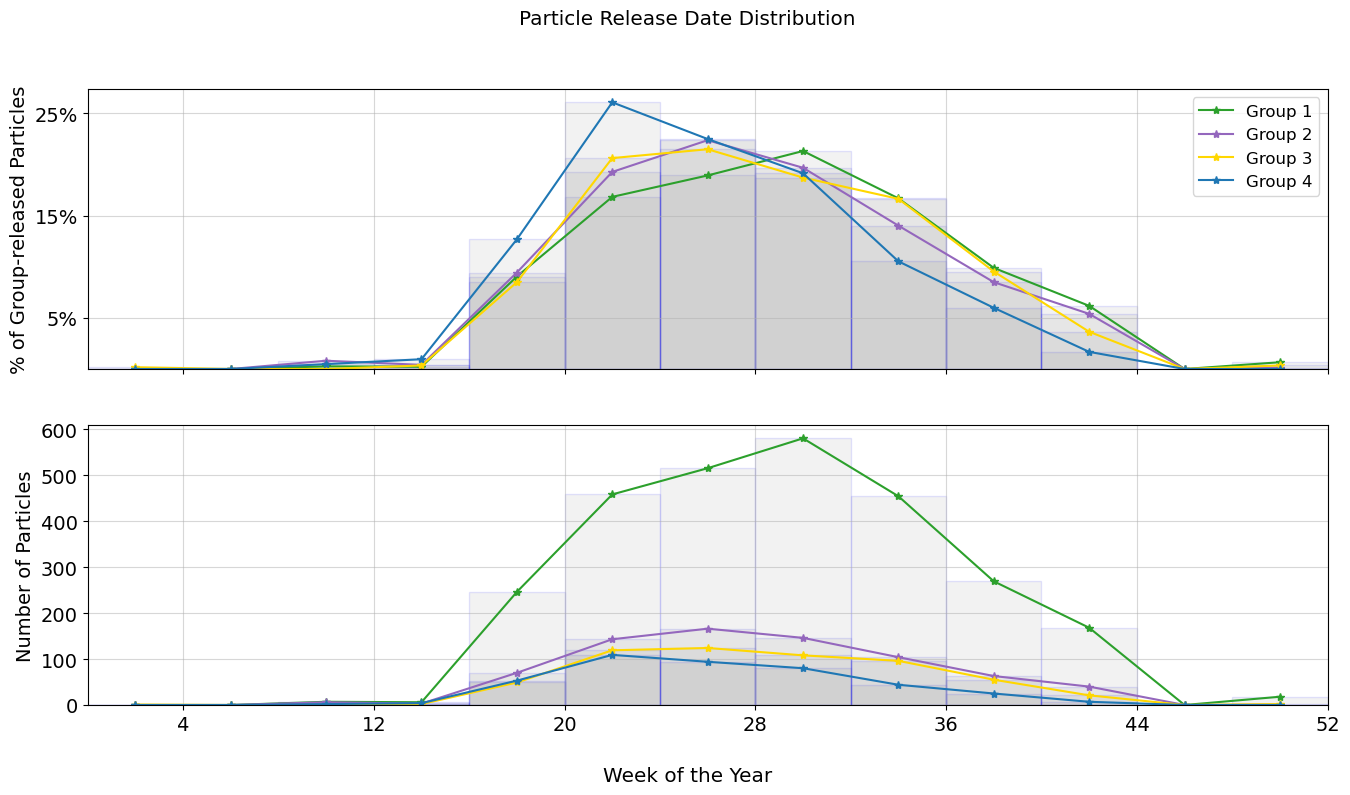

In [14]:
# make a plot of just the group by group seasonal release

# plot on a figure
fig, ax = plt.subplots(figsize=(16,8),nrows=2, ncols=1,sharex=True)

plt.rcParams.update({'font.size': 12})
plt.suptitle("Particle Release Date Distribution")
fig.supxlabel('Week of the Year')

i = 0

# FIRST SUBPLOT
y,edges,_ = ax[0].hist(g1_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(g1_i))/len(g1_i))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:green",label="Group 1")

y,edges,_ = ax[0].hist(g2_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(g2_i))/len(g2_i))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:purple",label="Group 2")

y,edges,_ = ax[0].hist(g3_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(g3_i))/len(g3_i))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="gold",label="Group 3")

y,edges,_ = ax[0].hist(g4_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(g4_i))/len(g4_i))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:blue",label="Group 4")
    
# set labels
xticks=[2,4,6,8,10,12,14]
yticks=[0.05,0.15,0.25]
ax[0].set_xticks(xticks,labels=[4,12,20,28,36,44,52])
ax[0].set_yticks(yticks,labels=["5%","15%","25%"])
ax[0].legend(loc="best")
# ax[0].set_ylabel('% of Polynya-released Particles')
ax[0].set_ylabel('% of Group-released Particles')


# SECOND SUBPLOT
y,edges,_ = ax[1].hist(g1_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:green",label="Group 1")

y,edges,_ = ax[1].hist(g2_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:purple",label="Group 2")

y,edges,_ = ax[1].hist(g3_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="gold",label="Group 3")

y,edges,_ = ax[1].hist(g4_i,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:blue",label="Group 4")

ax[1].set_ylabel('Number of Particles')
ax[1].set_xlim([1, 14])
ax[1].grid(alpha=0.5)
ax[0].grid(alpha=0.5)


fig_path='/scratch/project_2000789/muramarg/reviews1/'
plt.savefig(fig_path + 'reviewer1_point2_v2.png',dpi=300)

### Make a time series of these points, colored by polynya

In [14]:
# add the release point scatter
dg = xr.open_dataset('/scratch/project_2000789/muramarg/copied_files/waom10extend_grd.nc')
lat_values = dg.lat_rho.values
long_values = dg.lon_rho.values
# residence time
xbins = np.r_[0:630:1]
ybins = np.r_[0:560:1]
# index of bins the particles ending in
x_new = np.digitize(xgrid,xbins)
y_new = np.digitize(ygrid,ybins)
stack = np.stack((ygrid, xgrid), axis=-1)
lat2 = interpn((ybins,xbins),lat_values,stack)
long2 = interpn((ybins,xbins),long_values,stack)

In [15]:
points = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/text_files/points.txt",sep=",")
points = points.reshape(391,2)
points

array([[471., 369.],
       [473., 370.],
       [474., 371.],
       [475., 371.],
       [518., 443.],
       [519., 444.],
       [521., 418.],
       [522., 377.],
       [522., 418.],
       [522., 419.],
       [522., 420.],
       [523., 373.],
       [523., 374.],
       [523., 375.],
       [523., 376.],
       [523., 377.],
       [523., 378.],
       [523., 418.],
       [523., 419.],
       [523., 420.],
       [523., 421.],
       [524., 368.],
       [524., 369.],
       [524., 373.],
       [524., 374.],
       [524., 375.],
       [524., 376.],
       [524., 377.],
       [524., 378.],
       [524., 379.],
       [524., 380.],
       [524., 418.],
       [524., 419.],
       [524., 420.],
       [524., 421.],
       [525., 370.],
       [525., 371.],
       [525., 372.],
       [525., 373.],
       [525., 374.],
       [525., 375.],
       [525., 376.],
       [525., 377.],
       [525., 378.],
       [525., 379.],
       [525., 380.],
       [525., 381.],
       [525.,

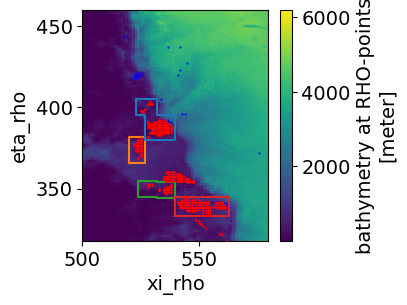

In [16]:
# make an array of 6586 based on the starting polynya
fig = plt.figure(figsize=(3,3))
ds1.h.isel().plot()
plt.plot(xgrid[0],ygrid[0],'.',markersize=0.5, color='r',zorder=5)
plt.plot(points[:,0],points[:,1],'.',color="blue",markersize=0.5,marker='o')

plt.xlim(500,580)
plt.ylim(318,460)

# darnley
s = np.array([527,540,540,527,527])
t = np.array([380,380,395,395,380])
b = np.array([[a,b] for a,b in zip(s,t)])
s = np.array([523,532,532,523,523])
t = np.array([395,395,405,405,395])
c = np.array([[a,b] for a,b in zip(s,t)])
c = sg.Polygon(c)
darnley = sg.Polygon(b)
darnley = unary_union([c,darnley])

# mackenzie
s = np.array([520,527,527,520,520])
t = np.array([366,366,382,382,366])
b = np.array([[a,b] for a,b in zip(s,t)])
mackenzie = sg.Polygon(b)

# davis
s = np.array([524,532,532,524,524])
t = np.array([345,345,355,355,345])
b = np.array([[a,b] for a,b in zip(s,t)])
s = np.array([532,540,540,532,532])
t = np.array([344,344,354,354,344])
c = np.array([[a,b] for a,b in zip(s,t)])
c = sg.Polygon(c)
davis = sg.Polygon(b)
davis = unary_union([c,davis])

# mackenzie
s = np.array([540,563,563,540,540])
t = np.array([333,333,345,345,333])
b = np.array([[a,b] for a,b in zip(s,t)])
barrier = sg.Polygon(b)

# plot them
x, y = darnley.exterior.xy
plt.plot(x, y,label="darnley",zorder=5)

x,y = mackenzie.exterior.xy
plt.plot(x,y)

x,y = davis.exterior.xy
plt.plot(x,y)

x,y = barrier.exterior.xy
plt.plot(x,y)

In [17]:
# categorize the array pol_locs by the polygons
# coding 0 darnley, 1 mackenzie, 2 davis, 3 barrier, 4 other East of Bay, 5 other West of Bay
def polynya_categorize(x,y,darnley,mackenzie,davis,barrier):
    labels = np.array([],dtype=int)
    
    for xi,yi in zip(x,y):
        point = Point(xi,yi)
        
        # darnley
        if darnley.contains(point):
            labels = np.append(labels,0)
            
        # mackenzie
        elif mackenzie.contains(point):
            labels = np.append(labels,1)
            
        # davis
        elif davis.contains(point):
            labels = np.append(labels,2)

        # barrier
        elif barrier.contains(point):
            labels = np.append(labels,3)
            
        # east
        elif yi<380:
            labels = np.append(labels,4)  #,4)
            
        # west
        elif yi>=380:
            labels = np.append(labels,5)  #,5)
        
    return(labels)

# # # code an entire array of value based on polynya name
mylabels = polynya_categorize(xgrid[0],ygrid[0],darnley,mackenzie,davis,barrier)
print(mylabels.shape)
print(np.where(mylabels ==0))

(4458,)
(array([ 380,  381,  382, ..., 2844, 2845, 2846]),)


In [14]:
# select by the polynya name
darnley_i = np.where(mylabels == 0)
darnley_s = df_months_i[darnley_i]
mack_i = np.where(mylabels == 1)
mack_s = df_months_i[mack_i]
davis_i = np.where(mylabels == 2)
davis_s = df_months_i[davis_i]
barrier_i = np.where(mylabels == 3)
barrier_s = df_months_i[barrier_i]
east_i = np.where(mylabels == 4)
east_s = df_months_i[east_i]
west_i = np.where(mylabels == 5)
west_s = df_months_i[west_i]

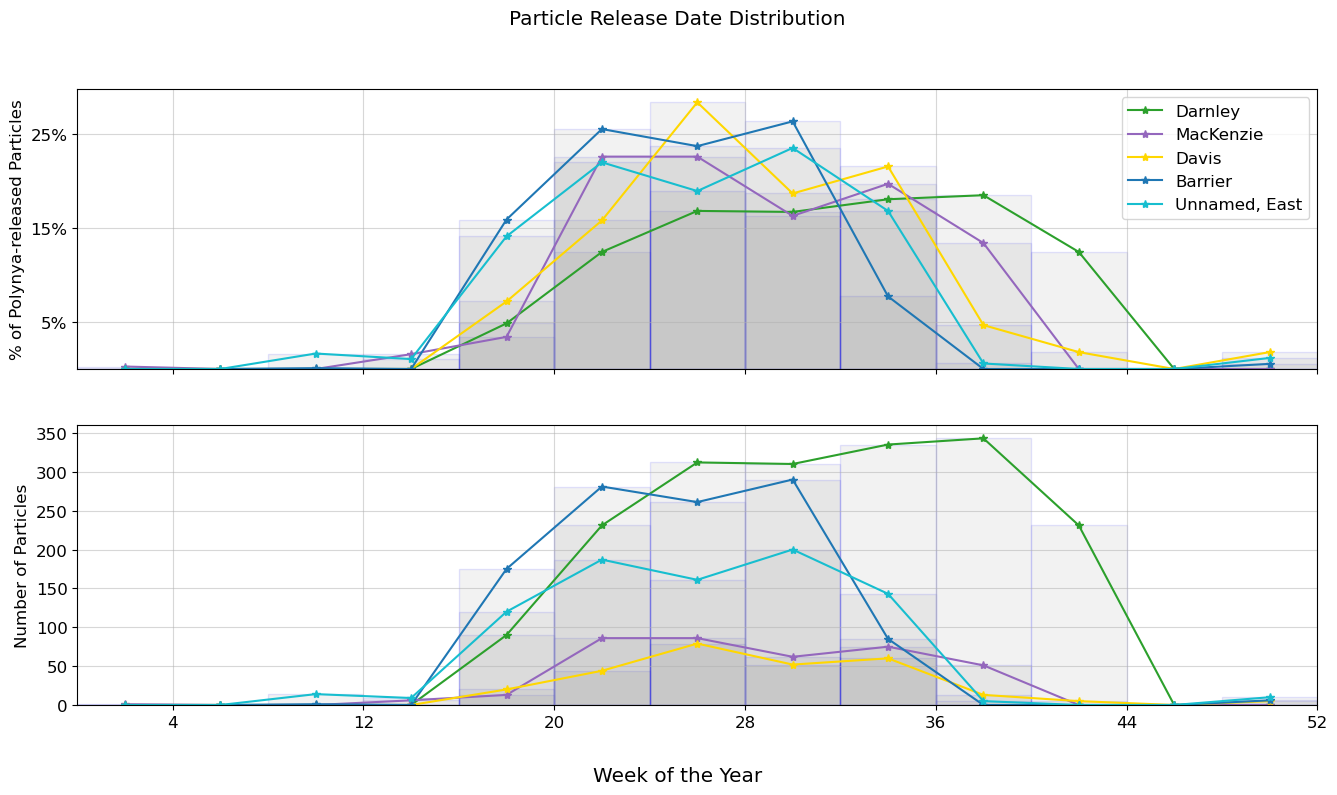

In [42]:
# plot on a figure
fig, ax = plt.subplots(figsize=(16,8),nrows=2, ncols=1,sharex=True)

plt.rcParams.update({'font.size': 12})
plt.suptitle("Particle Release Date Distribution")
fig.supxlabel('Week of the Year')

i = 0

# FIRST SUBPLOT
y,edges,_ = ax[0].hist(darnley_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(darnley_s))/len(darnley_s))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:green",label="Darnley")

y,edges,_ = ax[0].hist(mack_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(mack_s))/len(mack_s))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:purple",label="MacKenzie")

y,edges,_ = ax[0].hist(davis_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(davis_s))/len(davis_s))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="gold",label="Davis")

y,edges,_ = ax[0].hist(barrier_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(barrier_s))/len(barrier_s))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:blue",label="Barrier")

y,edges,_ = ax[0].hist(east_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(east_s))/len(east_s))
xcenters = (edges[:-1] + edges[1:]) / 2
ax[0].plot(xcenters,y,'-*',color="tab:cyan",label="Unnamed, East")

# y,edges,_ = ax[0].hist(west_s,alpha=0.1,edgecolor="blue",facecolor="gray",
#                      bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],weights=np.ones(len(west_s))/len(west_s))
# xcenters = (edges[:-1] + edges[1:]) / 2
# ax[0].plot(xcenters,y,'-*',color="tab:pink",label="Unnamed, West")
    
# set labels
xticks=[2,4,6,8,10,12,14]
yticks=[0.05,0.15,0.25]
ax[0].set_xticks(xticks,labels=[4,12,20,28,36,44,52])
ax[0].set_yticks(yticks,labels=["5%","15%","25%"])
ax[0].legend(loc="best")
ax[0].set_ylabel('% of Polynya-released Particles')

# SECOND SUBPLOT
y,edges,_ = ax[1].hist(darnley_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:green",label="Darnley")

y,edges,_ = ax[1].hist(mack_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:purple",label="MacKenzie")

y,edges,_ = ax[1].hist(davis_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="gold",label="Davis")

y,edges,_ = ax[1].hist(barrier_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:blue",label="Barrier")

y,edges,_ = ax[1].hist(east_s,alpha=0.1,edgecolor="blue",facecolor="gray",
                     bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
xcenters = (edges[:-1] + edges[1:]) / 2
ax[1].plot(xcenters,y,'-*',color="tab:cyan",label="Unnamed, East")

# y,edges,_ = ax[1].hist(west_s,alpha=0.1,edgecolor="blue",facecolor="gray",
#                      bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# xcenters = (edges[:-1] + edges[1:]) / 2
# ax[1].plot(xcenters,y,'-*',color="tab:pink",label="Unnamed, West")

ax[1].set_ylabel('Number of Particles')
ax[1].set_xlim([1, 14])
ax[1].grid(alpha=0.5)
ax[0].grid(alpha=0.5)

plt.savefig("/scratch/project_2000789/muramarg/floats_WAOM/FINAL/dsw/seasonal_dist.png", dpi=300)

### Can we do the same for the groups themselves?

(35040, 4458, 2)

## Write the points to a text file

In [7]:
# write the above to a text file
firstline = 'POS = G, C, T, N,   Ft0,    Fx0,    Fy0,    Fz0,    Fdt,    Fdx,    Fdy,   Fdz'
secline = ''
G = "1"
C = "0"
T = "1"
N = "52"
Ft0 = '0.1d0'

Fz0 = '0.0d0'
Fdt = '7.0d0'
Fdx = '0.0d0'
Fdy = '0.0d0'
Fdz = '0.0d0'
lines = [firstline, secline]
for i,j in zip(polynyas[:,0],polynyas[:,1]):
    # create the line to add to lines
    line = "\t"+G+"  "+C+"  "+T+"  "+N+"   "+Ft0+"   "+str(i)+"d0   "+str(j)+"d0   "+Fz0+"   "+Fdt+"   "+Fdx+"   "+Fdy+"   "+Fdz
    lines.append(line)
with open("/scratch/project_2000789/muramarg/floats_WAOM/testpoints.txt", 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')
f.close()

In [13]:
polynyas.tofile("/scratch/project_2000789/muramarg/floats_WAOM/unionpoints2.txt",sep=",")
pts = polynyas

## Does the monthly average exist when compared to waom_yearly_floats

In [14]:
pol_locs.tofile("/scratch/project_2000789/muramarg/floats_WAOM/polynya_locs.txt",sep=",")

In [11]:
with open("/users/muramarg/points.txt","r") as f:
    lines = (f.readlines())
    lines = lines[2:]
x = np.array([])
y = np.array([])
for line in lines:
    x = np.append(x,(int(line[:3])))
    y = np.append(y,int(float(line[-6:-1])))
f.close()

pts = np.stack((x,y)).T

In [15]:
# make an array month by month of whether the polynya exists at this time in this release point
exists = np.full((12,391),np.nan)

# loop through each month of data
for month in range(12):
    xmonth = pol_locs[0][month][~np.isnan(pol_locs[0][month])]
    ymonth = pol_locs[1][month][~np.isnan(pol_locs[1][month])]
    
    m = np.stack((xmonth,ymonth)).T
    #print(m)
   
    # loop through the release points and see if any are in the month
    for i in range(len(pts)):
        pt = pts[i]
        if pt in m:
            exists[month][i] = 1
        else:
            exists[month][i] = 0

In [16]:
# exists is now the month by month array of whether the polynya exists in the range of points
exists.tofile("/scratch/project_2000789/muramarg/floats_WAOM/polynya_seasons.txt",sep=",")
pts.tofile("/scratch/project_2000789/muramarg/floats_WAOM/points.txt",sep=",")

In [18]:
exists = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/polynya_seasons.txt",sep=",")
pts = np.fromfile("/scratch/project_2000789/muramarg/floats_WAOM/points.txt",sep=",")

In [19]:
exists = exists.reshape(12,391)